# Midterm project
# Written by Ben Tankus 2-6-21

## You will have three major tasks, 
### one is to wrangle the data into a format that allows you to do work on it and load it into a database.
   
   #### DONE in group project


 
 
## The next is to answer 3 questions about your data which are moderately complex and provide accompanying visualizations if appropriate (at least 3 total), 
    Questions: 
         1. Is it worth getting more pans dirty? (Is there a positive correlation between spoonscore and equipment count)
            # Viz - Scatter of pan-count to spoon score
         2. What factor contributes the most to spoonscore - Linear Regression - Correlation matrix (check dependent), scatter plot (check assumptions), Bar chart (show relative impact)
         3. Are vegan recipes more expensive? - Scatter
    
    In addition to simply answering the question you should come up with at least 3 visualizations total




## you also need to end up with your data inside an relational database. A local SQLite database would be sufficient.
    #You should load as much of your data as possible into a relational database.



In [425]:
# Initialize stuff
import os, pandas as pd, pprint, numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats



## 1. Is it worth getting more pans dirty? (Is there a positive correlation between spoonscore and equipment count)
            # Viz - Scatter of pan-count to spoon score

In [73]:
os.getcwd()
#os.chdir(os.path.dirname(os.getcwd()))
#os.chdir('CS512')
#os.getcwd()


'C:\\Users\\tanku\\OneDrive\\CodeRoot\\PyRoot\\CS512'

In [340]:
df = pd.read_csv('csvRecipe.csv', index_col = 'id')
df.head()

df.index

Int64Index([247533, 240069, 255341, 277083, 124190,  27162, 252211, 145072,
            225936,  46756,
            ...
             30736, 128068, 270741, 279667, 273834, 173480, 289202, 228043,
            178168, 131413],
           dtype='int64', name='id', length=211)

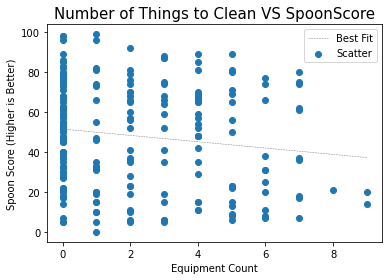

In [405]:
# 

#equipmentLen = [equipmentLen.append(len(item)) for item in df['equipment']]

#equipmentLen = pd.DataFrame({'id': '', 'equipmentLen': ''})
equipmentLen = {}
equipmentLenNoScore = {}

i = 0 # REFORMAT CSV LOOP COUNTER

# REFORMAT EQUIPMENT CSV INTO ROBUST DICTIONARY OF COUNTS
for item in df['equipment']:
    
    #try:  # HANDLE EMPTY EQUIPMENT LISTS
    #print(type(item))
    if type(item) == str:
        item = item.replace("'", "").replace("[", "").replace("]", "")
        itemList = item.split(",") # HANDLES MULTI-WORD TOOLS
        #print('item: ', (itemList), len(list((itemList))))
        equipmentLen[df.index[i]] = (len(itemList), df['spoonScore'].iloc[i])
        equipmentLenNoScore[df.index[i]] = len(itemList)

    else: 
        #print('No Equipment')
        equipmentLen[df.index[i]] = (0, df['spoonScore'].iloc[i])
        equipmentLenNoScore[df.index[i]] = 0


    i += 1

    
    
count, score = [], []
[count.append(x[0]) for x in equipmentLen.values()]
[score.append(x[1]) for x in equipmentLen.values()]

countArray = np.array(count)
scoreArray = np.array(score)
m, b = np.polyfit(countArray, scoreArray, 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(count, score, label = 'Scatter')
ax.plot(countArray, m*countArray + b, color = 'grey', linestyle = 'dashed', linewidth = 0.5, label = 'Best Fit')
ax.legend()
ax.set_xlabel('Equipment Count', fontsize=10)
ax.set_ylabel('Spoon Score (Higher is Better)', fontsize=10)
ax.set_title('Number of Things to Clean VS SpoonScore', fontsize=15)

dfLenNoScore = pd.DataFrame(columns = ['id', 'EquipLen']) # CONVERT TO DATAFRAME FOR FUTURE CONCATENATION
dfLenNoScore['id'] = equipmentLenNoScore.keys()
dfLenNoScore['EquipLen'] = equipmentLenNoScore.values()
#dfLenNoScore = pd.DataFrame(equipmentLenNoScore.keys(), equipmentLenNoScore.values())
dfLenNoScore = dfLenNoScore.set_index('id')

In [406]:
#pprint.pprint(equipmentLen)

m
#equipmentLenNoScore.key()
dfLenNoScore

,EquipLen
id,
247533,9
240069,3
255341,2
277083,2
124190,0
...,...
173480,5
289202,4
228043,2


Suprisingly, the more equipment you bring out, the worse the spoonscore gets. One would expect improvements in the food quality equivilent to the increase in work / cleanup, but in this case there is roughly a 1.5 point decline in score for each additional equipment item used in the recipe. 

Issues in the analysis:
The equipment list is read in as a string from the CSV when equipment is available, and a float when it's empty. This introduces issues when cleaning the data, as string arguments are not useable in float type data. I handled this with a simple if statement. I also wanted to structure this data for potential future use, so I organized the data in this question into a dictionary with RecipeID key, and a tuple of (EquipmentCount, SpoonScore). This allows for easy understanding of the code at a future date, and easy parsing of the data for future analysis in this project.
The best-fit line was a bit of added complexity. It wasn't required, but I think it adds to the visual. I had to research the basic numpy polynomial fitting procedure, and then add this line to the plot without distracting from the main data. This line shows the reader at a glance if the data is truely negatively or positively correlated.

## 2. What factor contributes the most to spoonscore 
    - Linear Regression - Correlation matrix (check dependent), scatter plot (check assumptions), Bar chart (show relative impact)


In [352]:
df.corr()

,spoonScore,Vegan,Vegetarian,readyInMinutes,PricePerServing
spoonScore,1.000000,0.047239,-0.142723,0.017008,0.456918
Vegan,0.047239,1.000000,0.485291,-0.003093,-0.130298
Vegetarian,-0.142723,0.485291,1.000000,-0.074186,-0.233094
readyInMinutes,0.017008,-0.003093,-0.074186,1.000000,-0.042705
PricePerServing,0.456918,-0.130298,-0.233094,-0.042705,1.000000


<ipython-input-503-b1c6e6453247>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQuant['logReadyInMinutes'] = np.log10(dfQuant['readyInMinutes'])
<ipython-input-503-b1c6e6453247>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQuant['logPricePerServing'] = np.log10(dfQuant['PricePerServing'])


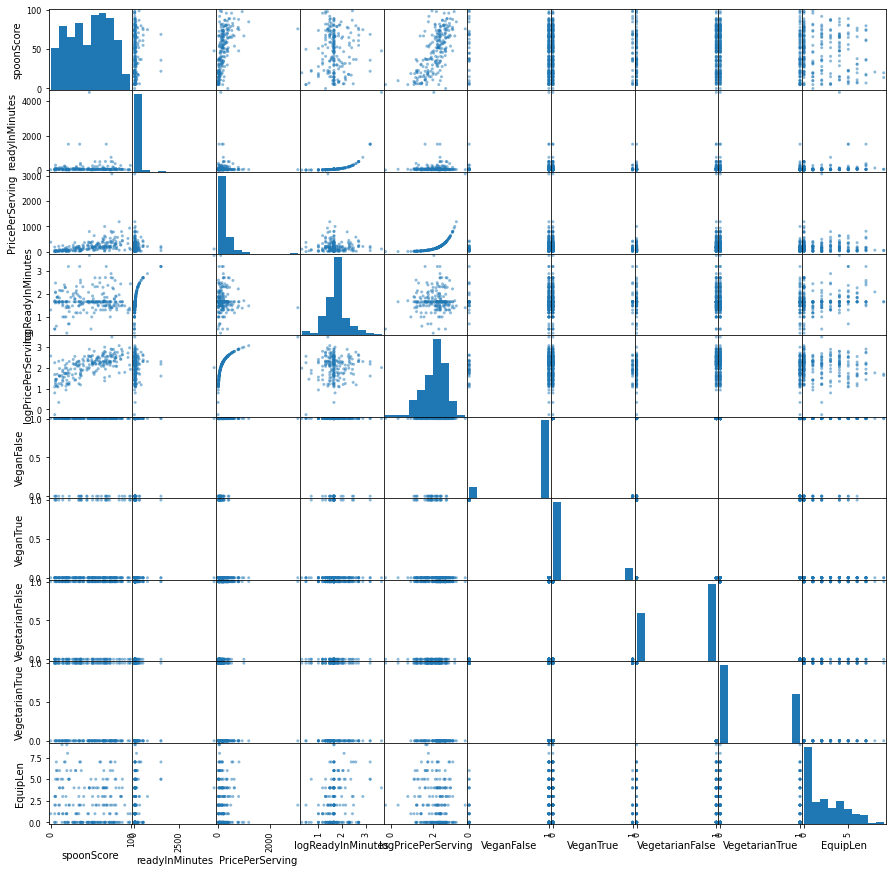

In [503]:
# Scatter matrix
# Factorize vegan and vegetarian variables for use in linear model

dfQuant = df[['spoonScore',  'readyInMinutes', 'PricePerServing']]

dfQuant['logReadyInMinutes'] = np.log10(dfQuant['readyInMinutes'])
dfQuant['logPricePerServing'] = np.log10(dfQuant['PricePerServing'])


dfVegan = pd.get_dummies(df['Vegan'])
dfVeganHalf = dfVegan.rename(columns = {False: 'VeganFalse', True: 'VeganTrue'})

dfVegetarian = pd.get_dummies(df['Vegetarian'])
dfVegetarianHalf = dfVegetarian.rename(columns = {False: 'VegetarianFalse', True: 'VegetarianTrue'})
dfFullModel = pd.concat([dfQuant,dfVeganHalf, dfVegetarianHalf,dfLenNoScore ], axis = 1)

scatterMatrix = pd.plotting.scatter_matrix(dfFullModel, figsize = (15, 15))

Really the only thing that correlates is spoonscore with price per serving and equipment length. The log(pricePerServing) correlates a bit better but not enough to risk the increase of model complexity that the addition of this term would do. I reccomend creating the model with just spoonscore VS pricePerServing. There is strong multicolinearity with log(readyInMinutes) and equipment length which makes sense. As the equipment length increases, it will take more time. I will add an interaction term for this. Using log here is relevant due to the wide variance of the readyinminutes field. Many recipes take 15 minutes, but many also take 60min - 200min.

### Linear Regression model using:
    Spoonscore = Beta0 + Beta1(PricePerServing) + Beta2(EquipmentCount) + Beta3(ReadyInMinutes:EquipmentCount) + Error

LinearRegression()

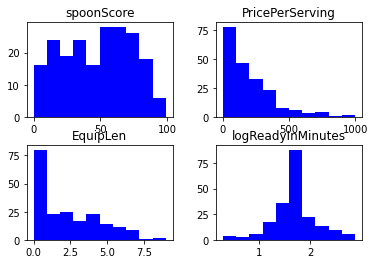

In [500]:

# Create relevant dataframe
dfLR = dfFullModel[['spoonScore', 'PricePerServing', 'EquipLen', 'logReadyInMinutes']]

pd.DataFrame.to_csv(dfLR, 'cleanDF.csv')

# Drop outliers
dfLR = dfLR[(np.abs(stats.zscore(dfLR['PricePerServing'])) < 3)] # Drop rows less than 3 stdev from zscore
dfLR = dfLR[(np.abs(stats.zscore(dfLR['EquipLen'])) < 3)]
dfLR = dfLR[(np.abs(stats.zscore(dfLR['logReadyInMinutes'])) < 3)]

X = dfLR.drop('spoonScore', axis = 1)
Y = list(dfLR['spoonScore'])

# Create train / test params
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

dfLR.hist(grid = False, color = 'blue')
fitLM = LinearRegression()
fitLM.fit(X_train, y_train)


In [462]:

intercept = fitLM.intercept_
coefficient = fitLM.coef_


print('i', intercept, 'coef', coefficient)

i 18.628323819612476 coef [ 0.08209611 -1.23026668  9.41923376]


### I can't figure out how to fit a linear model with interaction terms in python, so I finished fitting the full model in R. The interaction term had a pvalue of 0.63 meaning it's not valuable, so continue with the three non-interaction terms.
    For reference, pvalues for intercept, priceperserving, equipmentlen, and logreadyinminutes are 1.4e-06, 2.6e-12, 0.03, and 0.04 respectively

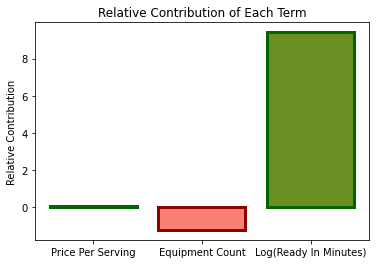

In [497]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Relative Contribution of Each Term', ylabel = 'Relative Contribution')
vert_bars = ax.bar(['Price Per Serving','Equipment Count','Log(Ready In Minutes)'], coefficient)

for bar, height in zip(vert_bars, coefficient):
    if height < 0:
        bar.set(color='salmon', edgecolor='darkred', linewidth=3)
    else:
        bar.set(color='olivedrab',edgecolor='darkgreen', linewidth=3)



## 3. Are vegan recipes more expensive? 
    - Scatter plot

In [549]:
dfQ3 = df[['Vegan', 'PricePerServing']]
dfQ3 = dfQ3[(np.abs(stats.zscore(dfQ3['PricePerServing'])) < 3)] # Drop rows less than 3 stdev from zscore

#dfQ3 = pd.concat([pd.get_dummies(dfQ3['Vegan']), dfQ3['PricePerServing']], axis = 1)

(0.0, 1000.0)

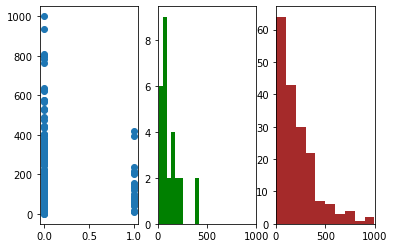

In [559]:
fig = plt.figure()
ax = fig.subplots(ncols=3)
ax[0].scatter(dfQ3['Vegan'], dfQ3['PricePerServing'])

veganSeries = dfQ3[dfQ3['Vegan'] == True]['PricePerServing']
ax[1].hist(veganSeries, color = 'green')
ax[1].set_xlim(0, 1000)



nonVeganSeries = dfQ3[dfQ3['Vegan'] != True]['PricePerServing']
ax[2].hist(nonVeganSeries, color = 'brown')
ax[2].set_xlim(0, 1000)




In [562]:
print("Vegan Series")
print(veganSeries.describe())
print('\nNon Vegan Series')
print(nonVeganSeries.describe())

Vegan Series
count     27.000000
mean     121.578889
std      104.710000
min       12.090000
25%       56.070000
50%       85.520000
75%      153.345000
max      420.520000
Name: PricePerServing, dtype: float64

Non Vegan Series
count    182.000000
mean     210.251813
std      195.688979
min        0.560000
25%       53.955000
50%      165.870000
75%      295.095000
max      999.300000
Name: PricePerServing, dtype: float64


From both the tables and the plots it can be seen that the mean p